### Quick examples for `quhops`, the quantum-classical hopping simulator

Using the waveguide simulator has default set up for the 7-site simulation of FMO design from the manuscript of Dr. Hao and Prof. Xianmin et. al. Following this work the units are in wave numbers (per cm). This means an evolution time of 1 corresponds to 1cm of waveguide propagation. 

The simulator works without needing to specify anything, but can be easily configured. So far it includes two examples, but I will add more in the coming days. The two main classes are:
* `waveguide_reversible_sink`, and 
* `waveguide_irreversible_sink`
They share all of the same functionality, with the only difference being how you spesify the waveguides. Everything is converted to [qutip](http://qutip.org/) objects before running the simulation. 


In [1]:
import quhops 

# create default objects
rev_simulator = quhops.waveguide_reversible_sink()
irev_simulator = quhops.waveguide_irreversible_sink()

These two simulators are ready to go with their default settings, and calculate a lot of things internally to quickly summarise results.

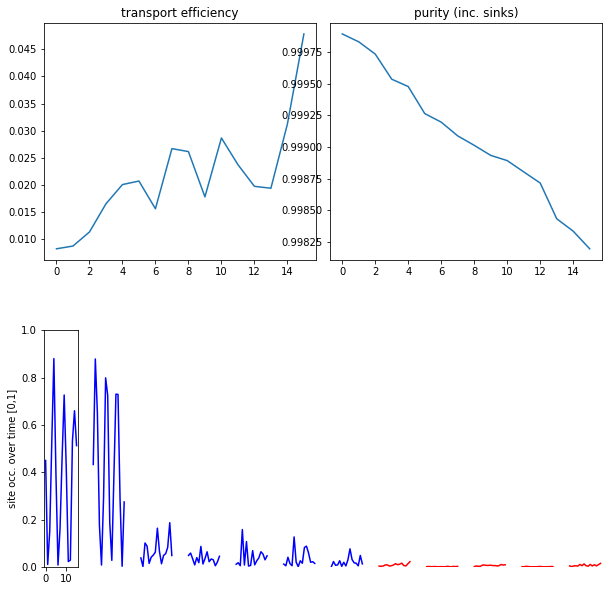

In [2]:
rev_simulator.simulate_waveguide(nb_segments = 16, #i.e. 16 different delta betas in the wave guide
                                     total_time = 16); # i.e. the wave guide is 16 cm long

rev_simulator.quick_summary()

This plots transport efficieny at each time, as well as total purity and site occupations (sinks are red). The simulation has used the default layout, but everything can be configuered. 

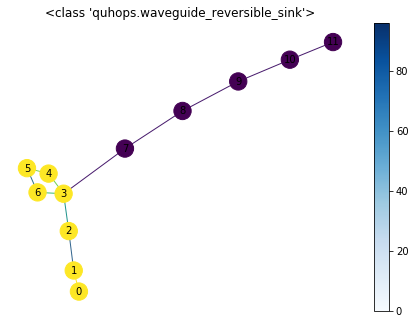

In [3]:
# Looking at the default layouts: (colors and length scales not functional yet)
rev_simulator.plot_waveguide(binary_colors=True, include_sinks=True)

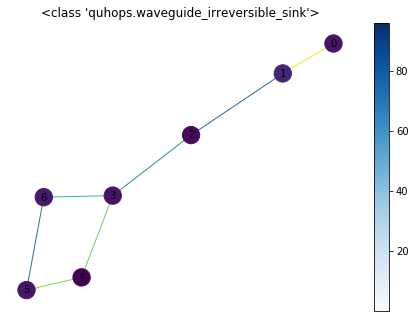

In [4]:
irev_simulator.plot_waveguide(binary_colors=False, include_sinks=False)

The main sites are yellow and the sinks are dark blue. The distance between sites here doesn't mean anything, but the edges show which sites are coupled. 

The simulators are imported with default waveguide couplings and sinks, but they are fully customizable. By specifying a coupling map, you can create any geometry, and add sinks anywhere. 

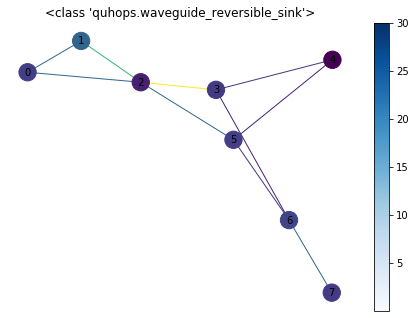

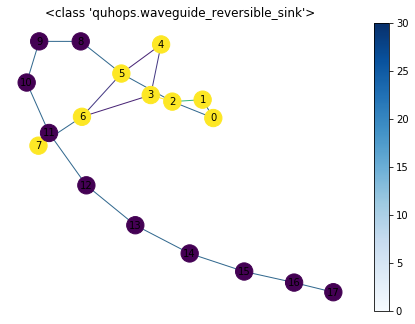

In [5]:
coupling_map = [[0, 1, 10], # e.g. site 0 and 1 are coupeled at a rate 10/cm
                [1, 2, 20],
                [0, 2, 10],
                [2, 3, -30],
                [3, 4, 5],
                [4, 5, 3],
                [5, 6, 5],
                [3, 6, 3],
                [6, 7, 10], 
                [2, 5, 10]] # sites are labeled form zero so there are 8 sites coupeled here    
dims = 10
sinks = [5, 10] # add a reverseable coupling (with 10 sinks) to site zero
rev_simulator = quhops.waveguide_reversible_sink(dims = 8, couplings=coupling_map, sink_sites=sinks)
rev_simulator.plot_waveguide()
rev_simulator.plot_waveguide(binary_colors=True, include_sinks=True)

* As you can see, there is a long sink attached to site 5. Also there are 8 sites total and have the coupling rates specified in the input. You can access the main site Hamiltonian directly by `rev_simulator.hamiltonian` (works for `irev class too`). 

* There are a lot of inputs avaliable to change, including all couplings rates/maps, delta beta, you can even specify a predefined hamiltonian. For safety you should always specify the dims (just in-case). E.g. see below

`
sim = quhops.waveguide_...(
hamiltonian,                           # input  Hamiltonian (default none)
dims,                                  # number of dimensions (default 7)
delta_beta,                            # The delta beta for generating a new Hamiltonian (defaul 10)
beta,                                  # Average of beta, either a number or list of length(dims)
couplings,                             # Couplig map, matrix, or single number (NN coupling)
recalc_couplings,                      # Boolean weather to use delta_beta's to calculate c_eff
seed,                                  # Seed for random unitary generation
initial_state,                         # initial state (site, or list of sites)
sink_sites,                            # Sites that have sinks coupeled (see below)
sink_rate,                             # Coupling rate for site-sink
verbose)                               # Print out useful notes when things happen `

* Everything is quite flexible for the input format, lists or single numbers, or array, I shouldn't matter too much

* Only difference between reversible and irreversible coupling is how the `sink_sites` are defined. 
    - for ***irreverseable*** coupling this is a single site or list of sites that are reversible coupled (e.g. `sink_sites=3` will add sink to site 3 or `sink_sites=[3,5]` will add sinks to BOTH three and 5
    - for ***reversible*** coupling you also have to respecify the NUMBER of sinks as well, e.g. `sink_sites=[3, 10]` will add 10 sinks (in a line) to site 3, and `sink_sites=[[3, 10], [5, 50]]` will add 10 (linear) sinks to site 3 and 50 (linear) sinks to site 5
Other than this, everything between the two cases is the same. 


#### Simple examples of using the simulators

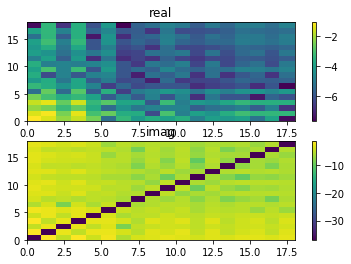

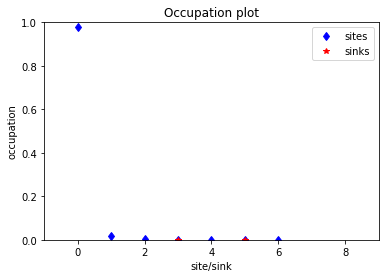

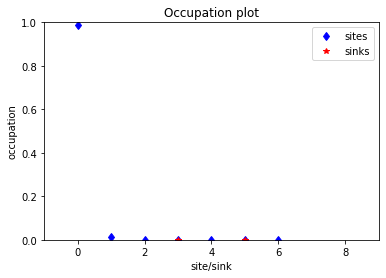

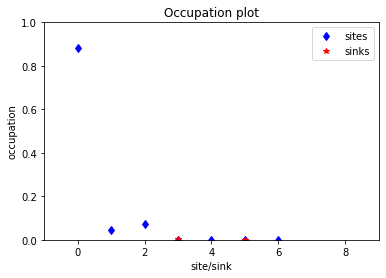

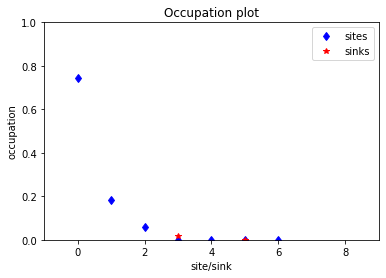

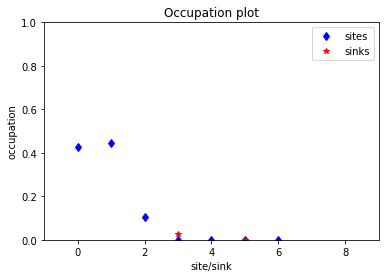

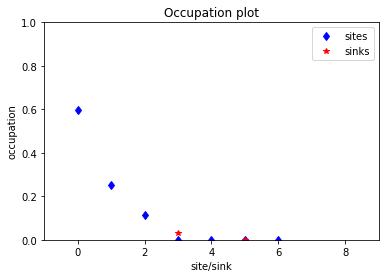

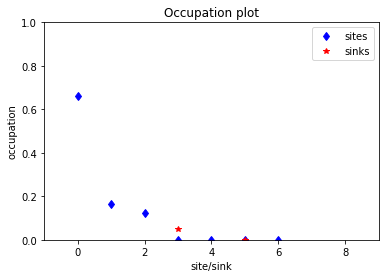

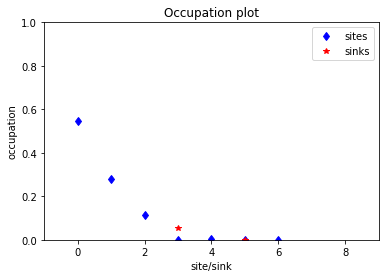

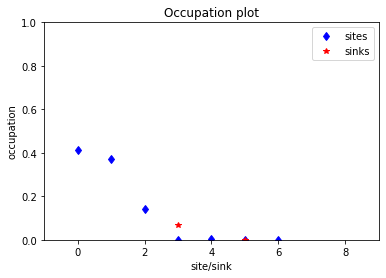

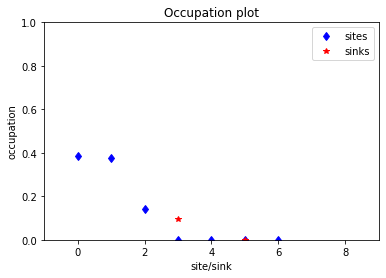

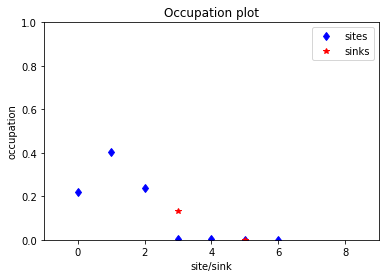

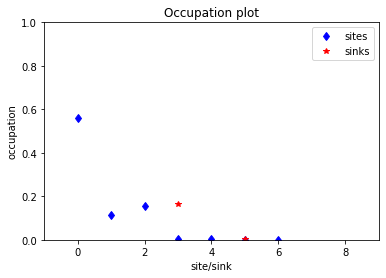

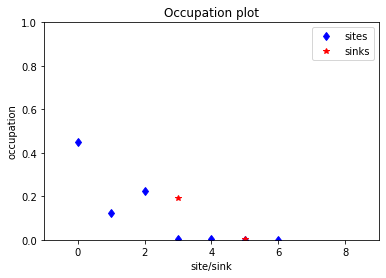

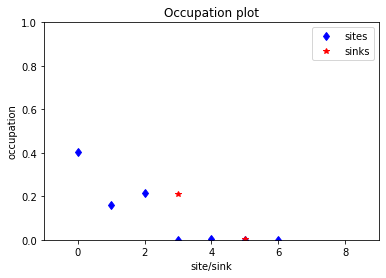

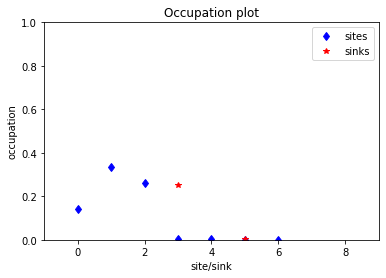

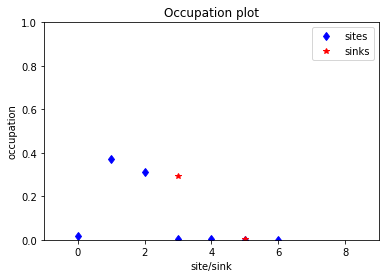

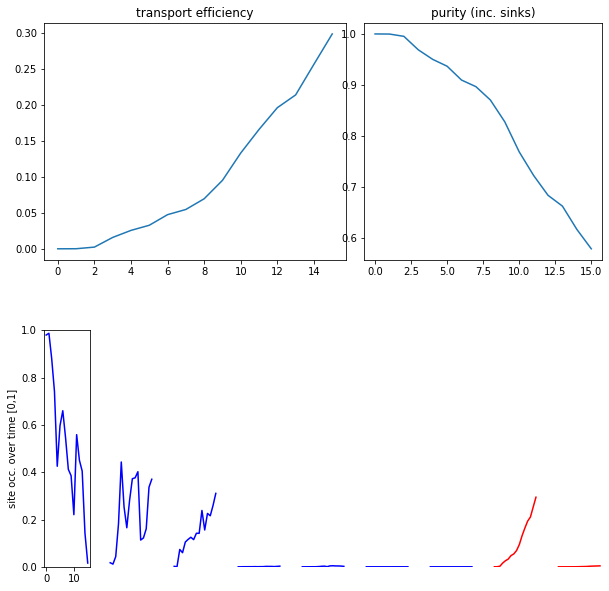

In [6]:
# View at Hamiltonain
rev_simulator.hamiltonian

# Look at full Hamiltonian including sinks
rev_simulator._extended_hamiltonian

# Look at irreversible operators
irev_simulator._dissipative_ops

# Generate New random hamiltonian from delta_beta 
rev_simulator.update_hamiltonian()

# Update the simulator with a new Hamiltonian 
H = rev_simulator.hamiltonian
rev_simulator.update_hamiltonian(hamiltonian=H)

# initial state (note this included all sinks as well)
rev_simulator.initial_state

# evolve the initial state under unitary evolution
rev_simulator.unitary_timestep(time=10)

# look at the current state
rev_simulator.current_state

# plot the current density matrix
rev_simulator.plot_operator(rev_simulator.current_state)

# make a new Hamiltonian and evolve it further under the new hamiltonian 
rev_simulator.update_hamiltonian()
rev_simulator.unitary_timestep(time=10)

# Evolve the simulator under a master equation (irreversible sinks)
irev_simulator.me_timestep(time = 10)

# show occupation after every segment
irev_simulator = quhops.waveguide_irreversible_sink(couplings=1)
irev_simulator.simulate_waveguide(nb_segments = 16,
                                      total_time = 16,
                                      plot_mid = True);
irev_simulator.quick_summary()